### _O problema_
_O presente problema se refere aos dados de vinhos portugueses "Vinho Verde", que possuem variantes de vinho branco e tinto. Devido a questões de privacidade, apenas variáveis físico-químicas (input) e sensoriais (output) estão disponíveis (por exemplo, não há dados sobre tipo de uva, marca do vinho, preço de venda, etc)._

### _Objetivo_
_Criar um modelo para estimar a qualidade do vinho._

### _Informação sobre os atributos_
_Variáveis input (baseado em testes físico-químicos):_
    01. Tipo
    02. Acidez fixa
    03. Volatilidade da acidez
    04. Ácido cítrico
    05. Açúcar residual
    06. Cloretos
    07. Dióxido de enxofre livre
    08. Dióxido de enxofre total
    09. Densidade
    10. pH
    11. Sulfatos
    12. Álcool
    
### _Variável output (baseado em dado sensorial):_
    13. Qualidade (score entre 0 and 10)
    
### _Resolução_
_1. Faça uma análise exploratória para avaliar a consistência dos dados e identificar possíveis variáveis que impactam na qualidade do vinho._
_2. Para a realização deste teste você pode utilizar o software de sua preferência (Python ou R), só pedimos que compartilhe conosco o código fonte (utilizando um repositório git). Além disso, inclua um arquivo README.md onde você deve cobrir as respostas para os 5 pontos abaixo:_

   a. Como foi a definição da sua estratégia de modelagem?   
   b. Como foi definida a função de custo utilizada?       
   c. Qual foi o critério utilizado na seleção do modelo final?      
   d. Qual foi o critério utilizado para validação do modelo? Por que escolheu utilizar este método?     
   e. Quais evidências você possui de que seu modelo é suficientemente bom?
 
 

---

O seguinte relatório foi realizado por Karina Zaccari utilizando a linguagem de programação Python, e tem como objetivo apresentar o modelo de estimativa da qualidade do vinho Verde.

Para desenvolvimento do projeto dividiu-se os pontos abordados nos seguintes tópicos, que serão cobertos a seguir:
    * Análise exploratória dos dados
    * Preparação dos dados
    * Modelo e seleção de variáveis
    * Validação do modelo 
    * Respostas finais e conclusões

Primeiramente importaremos as bibliotecas do Python que serão utilizadas para desenvolvimento do desafio proposto e o dataset.

In [1]:
#Bibliotecas utilizadas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
#Importando os dados
dados = pd.read_csv('winequality.csv', sep=';', delimiter=None, header='infer')
data = pd.DataFrame(dados)
data = data.rename(columns={'type' : ' Tipo', 'fixed acidity' : ' Acidez fixa', 'volatile acidity' : ' Volatilidade da acidez', 'citric acid' : ' Ácido cítrico', 'residual sugar' : ' Açúcar residual', 'chlorides' : ' Cloretos', 'free sulfur dioxide' : ' Dióxido de enxofre livre', 'total sulfur dioxide' : ' Dióxido de enxofre total', 'density' : ' Densidade', 'pH' : ' pH', 'sulphates' : ' Sulfatos', 'alcohol' : ' Álcool', 'quality' : 'Qualidade'})

---

## Análise exploratória dos dados

A análise exploratória dos dados será o primeiro passo da nossa jornada em busca de informações que agregam valor sobre os dados que estamos estudando. 

Essa análise tem como objetivo resumir as características principais dos dados, verificar a existência de dados faltantes, presença de _outliers_ e realizar transformações de variáveis caso seja necessário.

Conforme informado no enunciado do desafio, o banco de dados da qualidade do vinho possui 13 variáveis, sendo um delas a variável resposta (Qualidade) e 12 variáveis explicativas (Tipo, Acidez fixa, Volatilidade da acidez, Ácido cítrico, Açúcar residual, Cloretos, Dióxido de enxofre livre, Dióxido de enxofre total, Densidade, pH, Sulfatos e Álcool).

* **Distribuição dos dados**

Abaixo conseguimos visualizar a distribuição dos dados a partir dos histogramas.

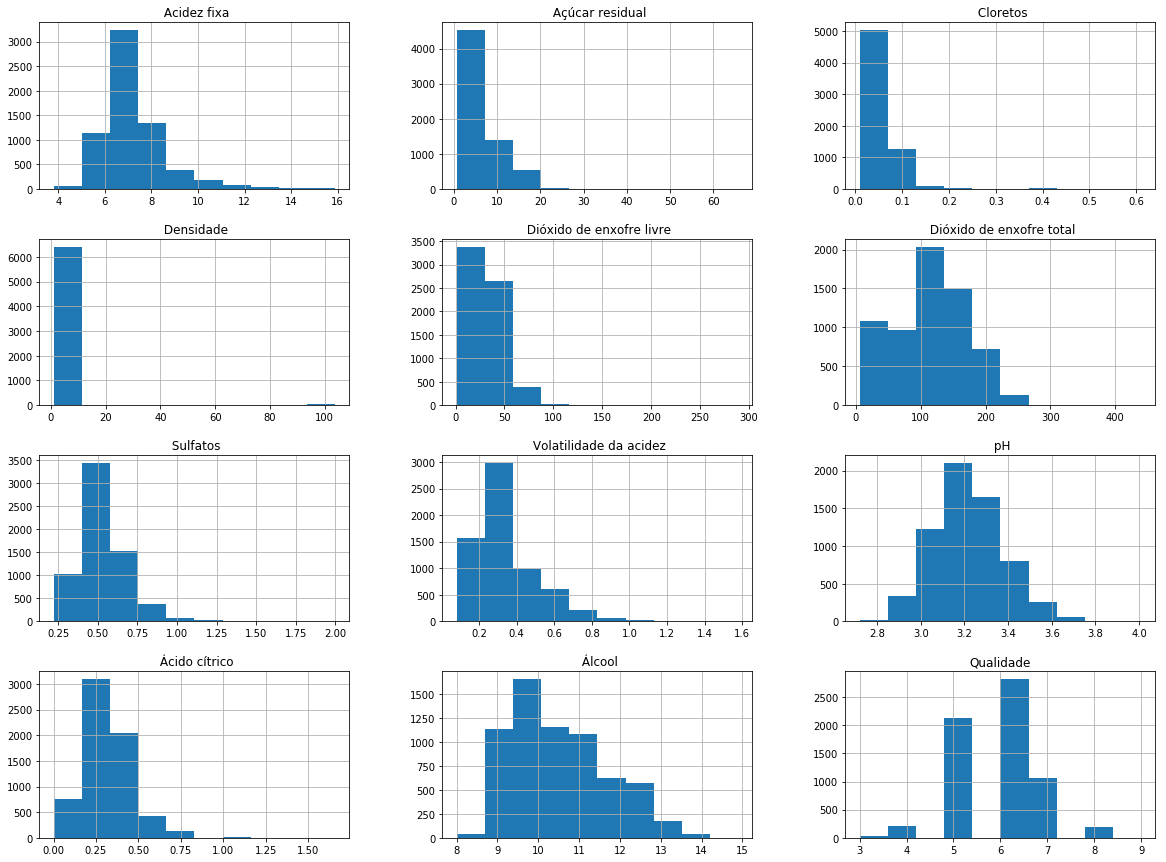

In [3]:
data.hist(figsize=(20,15))
plt.show()

Entre todos, o que mais chama atenção é o histograma da variável resposta (Qualidade), que nos mostra uma concentração nos valores 5, 6 e 7, caracterizando assim os nossos dados como desbalanceados. Tal fato será trabalhado na seção de "Preparo dos dados".

Fora isso, o comportamento das variáveis explicativas podem ser melhor analisados através de um _boxplot_ e de suas medidas resumo também. 

* **Medidas resumo**

Abaixo segue as principais medidas resumo de todas as variáveis do banco de dados:

In [4]:
np.round(data.describe(),3)

,Acidez fixa,Volatilidade da acidez,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
count,6457.000,6457.000,6457.000,6457.000,6457.000,6457.000,6457.000,6457.000,6457.000,6457.000,6457.000,6457.000
mean,7.219,0.340,0.319,5.446,0.056,30.496,115.691,1.715,3.219,0.531,10.489,5.817
std,1.295,0.165,0.146,4.764,0.035,17.757,56.595,7.659,0.161,0.149,1.193,0.874
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,103.898,4.010,2.000,14.900,9.000


A tabela acima nos mostra os valores mínimos e máximos de cada variável, além da média, desvio padrão e os percentis. A partir destes dados podemos supor que algumas variáveis estão propensas a possuir _outliers_, uma vez que possuem desvios padrão muito altos que, quando associados à média, nos trazem valores muito diferentes dos valores máximos e mínimos de cada variável. 

Basicamente, para sabermos se um dado é um _outlier_ ou não costumamos calcular um intervalo, dado por [Q1-1,5(Q3-Q1); Q3-1,5(Q3-Q1)], onde Q1 e Q3 são o primeiro percentil (25%) e o terceiro percentil (75%), respectivamente. Se algum dado estiver fora deste intervalo, podemos considerá-lo um _outlier_.


Tal fato pode ser visualizado também quando geramos o bloxpot de cada variável, conforme mostrado a seguir.

* **Boxplot de cada variável**

A partir do gráfico abaixo é possível confirmar a nossa suposição de existência de _outliers_ em nossos dados, principalmente as variáveis _Acidez fixa_, _Açúcar residual_, _Dióxido de enxofre livre_, _Dióxido de enxofre total_ e _Densidade_ (veja os pontos em preto no boxplot de cada uma delas).


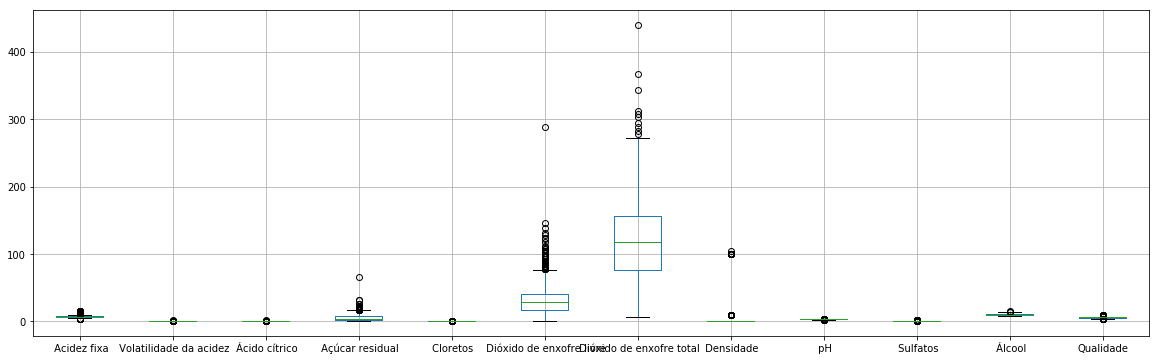

In [5]:
data.boxplot(figsize=(20,6))
plt.show()

Uma vez que desejamos realizar um modelo para estimar a qualidade do vinho, é possível que estes pontos flutuantes _atrapalhem_ a nossa previsão. Sendo assim, optou-se por removê-los da base para a construção do modelo final.

Ao retirarmos os _outliers_, verificamos que a nossa base passsa a ter 5946 dados, em vez de 6497 (quantidade original de dados).

In [6]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [7]:
data_trat = remove_outlier(data,' Acidez fixa')
data_trat = remove_outlier(data_trat,' Açúcar residual')
data_trat = remove_outlier(data_trat,' Dióxido de enxofre livre')
data_trat = remove_outlier(data_trat,' Dióxido de enxofre total')
data_trat = remove_outlier(data_trat,' Densidade')

In [8]:
len(data_trat)
print("A base final após retirarmos os outliers terá", len(data_trat), "dados.")

A base final após retirarmos os outliers terá 5908 dados.


A retirada dos _outliers_ pode ser verificada também no boxplot da nova base:

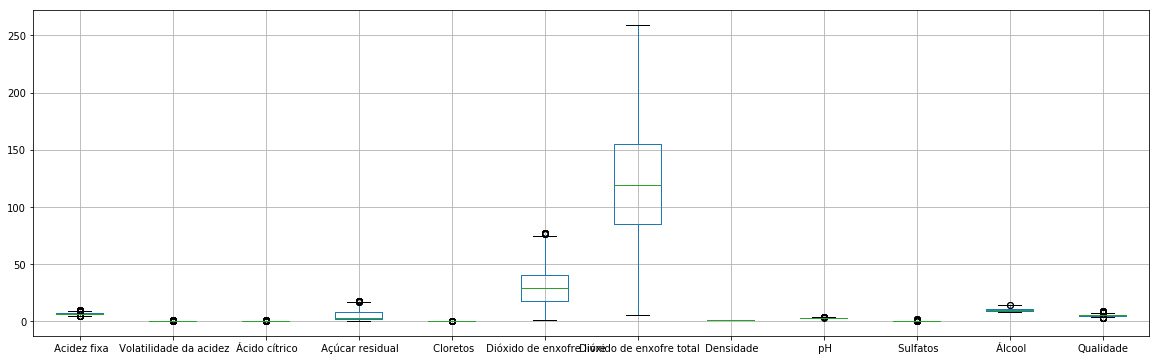

In [9]:
data_trat.boxplot(figsize=(20,6))
plt.show()

---

* **Matriz de Correlação**

A Matriz de Correlação mede o grau de relação linear entre cada par de variáveis do nosso banco de dados, e nos permite analisar simultâneamente a associação entre elas através dos coeficientes de Pearson, Spearman ou Kendall. Neste caso utilizamos o coeficiente de Pearson. Os valores de correlação podem cair entre -1 e +1. 

In [10]:
# PANDAS: Correlação
cor = data_trat.corr(method='pearson')
cor2 = pd.DataFrame(cor)
cor2.style.format("{:.1%}")

,Acidez fixa,Volatilidade da acidez,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
Acidez fixa,100.0%,18.7%,16.3%,-6.6%,23.7%,-19.5%,-19.2%,37.2%,-25.3%,17.4%,-13.9%,-11.3%
Volatilidade da acidez,18.7%,100.0%,-46.1%,-19.8%,37.4%,-36.5%,-42.7%,26.4%,29.0%,22.6%,-5.0%,-27.4%
Ácido cítrico,16.3%,-46.1%,100.0%,16.9%,-1.8%,24.2%,31.7%,-2.1%,-32.0%,-3.4%,-1.6%,8.7%
Açúcar residual,-6.6%,-19.8%,16.9%,100.0%,-12.4%,42.7%,49.2%,57.2%,-28.2%,-18.2%,-35.7%,-2.2%
Cloretos,23.7%,37.4%,-1.8%,-12.4%,100.0%,-17.6%,-24.5%,34.6%,5.9%,37.9%,-27.9%,-21.4%
Dióxido de enxofre livre,-19.5%,-36.5%,24.2%,42.7%,-17.6%,100.0%,70.9%,8.8%,-19.1%,-17.0%,-18.0%,9.3%
Dióxido de enxofre total,-19.2%,-42.7%,31.7%,49.2%,-24.5%,70.9%,100.0%,10.3%,-28.3%,-23.4%,-26.9%,-1.7%
Densidade,37.2%,26.4%,-2.1%,57.2%,34.6%,8.8%,10.3%,100.0%,6.9%,21.4%,-75.1%,-33.9%
pH,-25.3%,29.0%,-32.0%,-28.2%,5.9%,-19.1%,-28.3%,6.9%,100.0%,23.1%,11.0%,1.6%
Sulfatos,17.4%,22.6%,-3.4%,-18.2%,37.9%,-17.0%,-23.4%,21.4%,23.1%,100.0%,-1.1%,1.5%


A partir da Matriz de Correlação acima conseguimos visualizar que as variáveis que são mais correlacionadas entre si são _Dióxido de enxofre livre_, _Dióxido de enxofre total_, _Açúcar residual_, _Volatilidade da acidez_ e _Acidez fixa_. Sendo assim, precisamos tomar cuidado na criação do nosso modelo de predição, uma vez que a alta correlação entre estas variáveis pode causar o problema de comunalidade futuramente.

Abaixo as principais correlações entre as variáveis e alguns possíveis motivos pelos quais isso acontece:

* **_Dióxido de enxofre livre_ e _Dióxido de enxofre total_: correlação linear forte e positiva de 70,9%**: Talvez essa correlação seja alta pois ambos possuem a mesma base de entrada (inclusão de Dióxido de Enxofre para a criação de sulfitos, que são conservantes para o vinho). Além disso, vale lembrar que o Dióxido de Enxofre Total tem em sua composição o Dióxido de Enxofre Livre, por isso a sua grande correlação.


* **_Açúcar residual_ e _Dióxido de enxofre total / livre_: correlação linear positiva de 49,2% e 42,7%**: O Açúcar residual, nada mais é que o açúcar que não foi transformado em álcool no processo de fermentação, sendo que posteriormente parte dele se combina com o Dióxido de Enxofre Combinado (SO2 com outros moléculas, sendo o açúcar uma delas), exatamente por este motivo a correlação do Dióxido de Enxofre Total (que é a soma do Dioxido de Enxofre Livre e Composto) é maior que a correlação com o Dióxido de Enxofre Livre, visto que o segundo não possui estas moléculas combinadas (49,2% e 42,7%). 


* **_Volatilidade da acidez_ e _Ácido cítricos_: correlação linear negativa de 46,1%:** As uvas têm uma pequena presença de Ácido Cítrico em sua composição, que é reduzido ainda mais após o processo fermentação. O Ácido Cítrico possui um alto ponto de ebulição, por isto é considerado um Ácido Fixo (Ácidos com baixo grau de Ebulição são considerados Voláteis), por este motivo a volatilidade da Acidez possui uma correlação negativa ao Ácido Cítrico.


* **_Cloretos_ e _Sulfatos_: correlação linear positiva de 37,9%**: Parte dos Cloretos e Sulfatos já estão na presentes naturalmente na composição do vinho, porém uma parte são criados pela conversão dos sulfitos (Dióxido de Enxofre, por exemplo) inclusos para conservação no vinho, sendo este um dos motivos para a sua correlação. 


---

## Preparação dos dados

Uma vez que já retiramos os _outliers_ da base, agora iremos separá-la em duas partes: uma parte para o treino do nosso modelo (70% dos dados) e outra para o teste do modelo final (30% dos dados). 

Um ponto importante que precisamos analisar é que quando geramos o histograma das variáveis encontramos um desbalanceamento da variável resposta (Qualidade), veja:

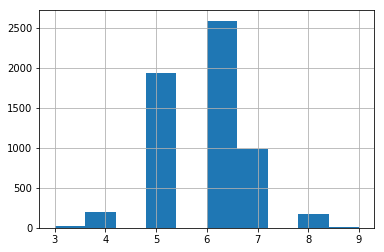

In [11]:
data_trat['Qualidade'].hist()
plt.show()

É possível ver que os dados estão concentrados, em sua maioria, nos valores 5, 6 e 7. 

Para tratarmos este problema vamos reclassificar os nossos dados de forma que:
* Os dados que possuírem notas na variável "Qualidade" maiores que 6.5 serão tratados como "bons";
* Os dados que possuírem notas na variável "Qualidade" menores que 6.5 serão tratados como "ruins";

Dessa forma, ao reclassificarmos a nossa variável resposta, ela terá o seguinte histograma:

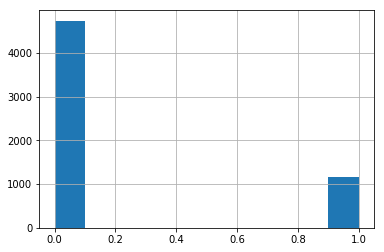

In [12]:
data_trat['Qualidade'] = np.asarray([1 if i>=7 else 0 for i in data_trat['Qualidade']])
data_trat['Qualidade'].hist()
plt.show()

Logo, a partir de agora temos uma variável resposta binária (0,1). A partir de agora vamos separar os nossos dados para treino e teste e verificar se a distribuição da variável resposta nos dois casos se mantiveram:

* **Separando os dados em dados de treino (70%) e dados de teste (30%)**:

Aqui separamos 4135 dados para treino e 1773 para teste.

In [13]:
data_trat[' Tipo'] = np.asarray([1 if i=='White' else 0 for i in data_trat[' Tipo']])

In [14]:
Y = data_trat['Qualidade'] #salva o label
X = data_trat.drop('Qualidade',axis=1) #salva o dado
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 12), (1773, 12), (4135,), (1773,))

* **Verificando se a variável resposta (Qualidade) tem a mesma distribuição/proporção nos dados de treino e dados de teste:**

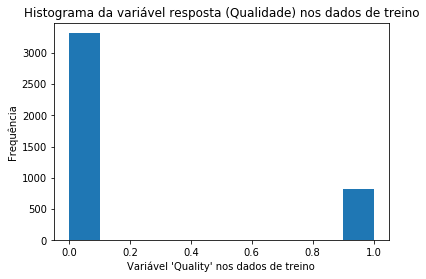

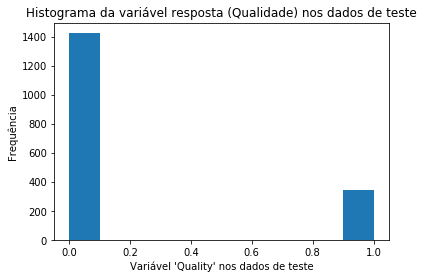

In [16]:
plt.hist(y_train)  # arguments are passed to np.histogram
plt.title("Histograma da variável resposta (Qualidade) nos dados de treino")
plt.xlabel("Variável 'Quality' nos dados de treino")
plt.ylabel("Frequência")
plt.show()

plt.hist(y_test)  # arguments are passed to np.histogram
plt.title("Histograma da variável resposta (Qualidade) nos dados de teste")
plt.xlabel("Variável 'Quality' nos dados de teste")
plt.ylabel("Frequência")
plt.show()

A partir dos histogramas acima conseguimos verificar que as proporções se mantiveram. Assim, uma vez que resolvemos este ponto, nosso próximo passo será aplicar os modelos e verificar qual modelo melhor de ajusta aos dados do nosso desafio.

Os modelos que aplicamos foram: Regressão Logística, Randon Forest e KNN. Os resultados de cada modelo encontram-se a seguir.

---

* **Modelo de Regressão Logística**

A Regressão Logística é uma técnica estatística que, a partir de um conjunto de observações, gera um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias.

Neste caso, a acurácia foi 81.69% para os dados de treino e 81.56% para os dados de teste, o que mostra que o modelo se ajustou razoavelmente bem aos dados. Ainda, para validar este modelo também temos valores de precision (0.79), recall (0.82), f1-score (0.78) e área abaixo da curva ROC (0.60).

In [17]:
model = LogisticRegression()
result=model.fit(X_train, y_train)
y_predict = result.predict(X_test)

# print('Score:', model.score(X_test, y_test))
acc_log = round(model.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

81.69 %


In [18]:
acc_log = round(model.score(X_test, y_test) * 100, 2)
print(round(acc_log,2,), "%")

81.56 %


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.84      0.96      0.89      1424
          1       0.58      0.24      0.34       349

avg / total       0.79      0.82      0.78      1773



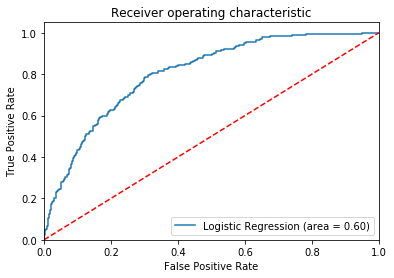

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

---

* **Modelo Random Forest**

O algoritmo Random Forest cria várias árvores de decisão e as combina para obter uma predição com maior acurácia e mais estável.

Neste caso, a acurácia foi 92.35% para os dados de treino e 41.57% para os dados de teste, o que mostra que o modelo se ajusta muito bem aos dados de treino, porém não se ajusta aos dados de teste. Mesmo assim, é possível verificar que a curva precision-recall nos forneceu um resultado de 0.74, o que é um valor muito bom, mesmo o modelo tendo uma acurácia menor nos dados de teste, fornecendo ainda um recall médio de 0.55 e precision 0.69.

In [22]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score

In [23]:
forest = RandomForestRegressor(n_estimators = 150)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
forest.score(X_test, y_test)
acc_random_forest = round(forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.35 %


In [24]:
acc_random_forest = round(forest.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

41.57 %


Text(0.5,1,'2-class Precision-Recall curve: AP=0.74')

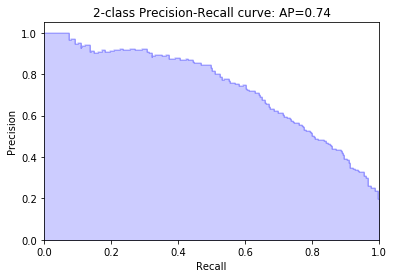

In [25]:
average_precision = average_precision_score(y_test, y_predict)
precision, recall, _ = precision_recall_curve(y_test, y_predict)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [26]:
print("Recall: ", recall.mean())
print("Precision: ", precision.mean())

Recall:  0.5581431126324493
Precision:  0.6916344992735171


---

* **Modelo KNN**

A ideia principal do KNN é determinar o rótulo de classificação de uma amostra baseado nas amostras vizinhas advindas de um conjunto de treinamento. 

A acurácia foi 86.26% para os dados de treino e 79.81% para os dados de teste, recall de 0.44 e precision de 0.56.

In [27]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_predict = model_knn.predict(X_test)
model_knn.score(X_test, y_test)

acc_knn = round(model_knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

86.26 %


In [28]:
acc_log = round(model_knn.score(X_test, y_test) * 100, 2)
print(round(acc_log,2,), "%")

79.81 %


Text(0.5,1,'2-class Precision-Recall curve: AP=0.29')

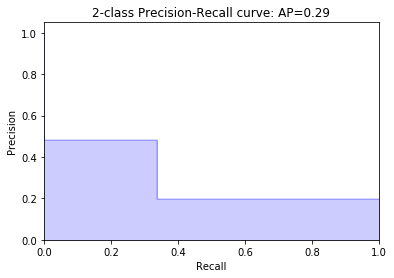

In [29]:
average_precision = average_precision_score(y_test, y_predict)
precision, recall, _ = precision_recall_curve(y_test, y_predict)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [30]:
print("Recall: ", recall.mean())
print("Precision: ", precision.mean())

Recall:  0.44603629417383
Precision:  0.5594913882078494


---

Entre os três modelos temos que o que mais se ajustou aos dados foi a **Regressão Logística**, com acurácia de 82.01% para os dados de treino e 80.88% para os dados de teste, o que mostra que o modelo se ajustou bem aos dados. Mesmo possuindo acurácias menores do que os outros modelos, a Regressão Logística apresentou valores razoavelmente melhores de recall, precision e área abaixo da curva ROC do que os outros modelos.
Sendo assim, optou-se por utilizar a **Regressão Logística** para a predição da qualidade do vinho.

---

### Referências bibliográficas

A teoria foi baseada no livro Inteligência Artificial: uma abordagem de Aprendizado de Máquina, 2011 (Katti Faceli, Ana C. Lorena, João P. Gama e André C. P. L. F. De Carvalho, editora LTC).

Mastering pandas – Femi Anthony – Packt Publishing, 2015.

Python for Data Analysis – Wes McKinney – USA: O'Reilly, 2013.

Tutoriais disponíveis no site oficial do Pandas - http://pandas.pydata.org/pandas-docs/version/0.18.0/tutorials.html

Livro de receitas disponíveis no site oficial do Pandas - http://pandas.pydata.org/pandas-docs/version/0.18.0/cookbook.html

Python for kids – A playful Introduction to programming – Jason R. Briggs – San Francisco – CA: No Starch Press, 2013.

Python Cookbook – David Beazley & Brian K. Jones – O'Reilly, 3th Edition, 2013.
